<a href="https://colab.research.google.com/github/s8narnor/Plant_disease_detection/blob/master/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
!pip install -q keras

In [ ]:
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
img_width, img_height = 150,150
train_data_dir = '/content/drive/My Drive/PlantVillage'
validation_data_dir = '/content/drive/My Drive/PlantVillage'
batch_size = 32

In [ ]:
datagen = ImageDataGenerator(
    rescale =1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    validation_split = 0.3)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    subset = "training",
    class_mode = 'categorical')

val_datagen =ImageDataGenerator(rescale = 1./255)

validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    subset = "validation",
    class_mode = 'categorical')

Found 14458 images belonging to 15 classes.
Found 6189 images belonging to 15 classes.


In [ ]:
from keras import layers
from keras.models import Model

def alexnet(in_shape=(150,150,3), n_classes=15, opt='sgd'):
    in_layer = layers.Input(in_shape)
    conv1 = layers.Conv2D(96, 11, strides=4, activation='relu')(in_layer)
    pool1 = layers.MaxPool2D(3, 2)(conv1)
    conv2 = layers.Conv2D(256, 5, strides=1, padding='same', activation='relu')(pool1)
    pool2 = layers.MaxPool2D(3, 2)(conv2)
    conv3 = layers.Conv2D(384, 3, strides=1, padding='same', activation='relu')(pool2)
    conv4 = layers.Conv2D(256, 3, strides=1, padding='same', activation='relu')(conv3)
    pool3 = layers.MaxPool2D(3, 2)(conv4)
    flattened = layers.Flatten()(pool3)
    dense1 = layers.Dense(4096, activation='relu')(flattened)
    drop1 = layers.Dropout(0.5)(dense1)
    dense2 = layers.Dense(4096, activation='relu')(drop1)
    drop2 = layers.Dropout(0.5)(dense2)
    preds = layers.Dense(n_classes, activation='softmax')(drop2)

    model = Model(in_layer, preds)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
	              metrics=["accuracy"])
    return model

if __name__ == '__main__':
    model = alexnet()
    print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 384)         885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         8849

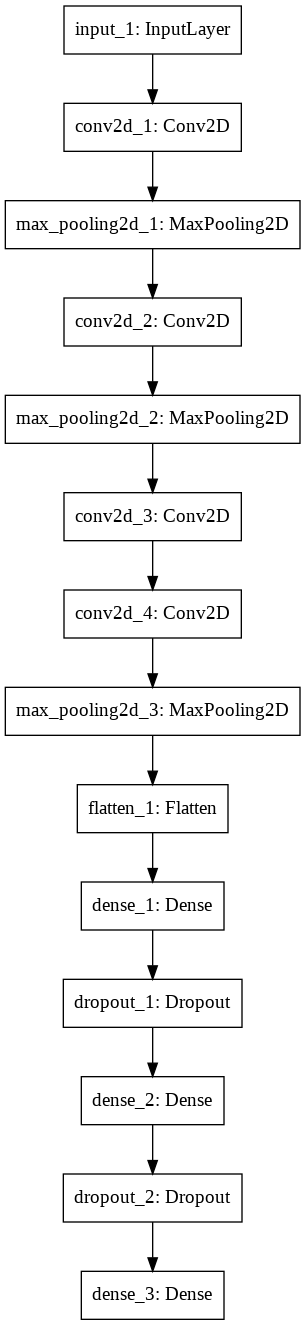

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file = 'model.png')

In [ ]:
from keras.callbacks import History
history = History()
model.fit_generator(
    train_generator,
    steps_per_epoch =388,
    epochs =30, verbose =1, callbacks=[history],
    validation_data=validation_generator,
    validation_steps =258)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


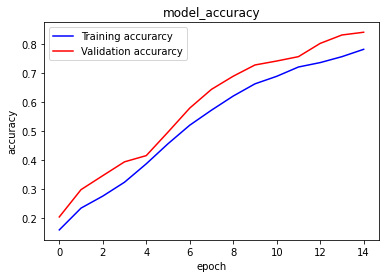

In [ ]:
print(history.history.keys())
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'b', label='Training accurarcy')
plt.plot(history.history['val_accuracy'], 'r', label='Validation accurarcy')
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

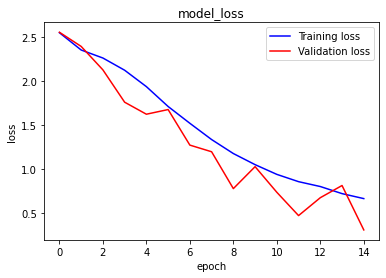

In [ ]:
plt.plot(history.history['loss'],'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 1f43d81a-6889-4613-a727-f92a75cf9861___RS_HL 0297.JPG to 1f43d81a-6889-4613-a727-f92a75cf9861___RS_HL 0297.JPG
1f43d81a-6889-4613-a727-f92a75cf9861___RS_HL 0297.JPG
[[4.4760840e-12 0.0000000e+00 7.4157410e-04 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9925846e-01
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
